# MNIST Demos in TFlearn

In [1]:
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])

# Building convolutional network
input_ = input_data(shape=[None, 28, 28, 1], name='input')
conv1 = conv_2d(input_, 32, 3, activation='relu', regularizer="L2")
pool1 = max_pool_2d(conv1, 2)
lrn1 = local_response_normalization(pool1)
conv2 = conv_2d(lrn1, 64, 3, activation='relu', regularizer="L2")
pool2 = max_pool_2d(conv2, 2)
lrn3 = local_response_normalization(pool2)
fc1 = fully_connected(lrn3, 128, activation='tanh')
drop1 = dropout(fc1, 0.8)
fc2 = fully_connected(drop1, 256, activation='tanh')
drop2 = dropout(fc2, 0.8)
fc3 = fully_connected(drop2, 10, activation='softmax')
opt = tflearn.Adam(learning_rate=0.01)
acc = tflearn.Accuracy()
target = regression(fc3, optimizer=opt, metric=acc,
                     loss='categorical_crossentropy', name='target')

# Training
model = tflearn.DNN(target, tensorboard_verbose=3, tensorboard_dir="logs")
model.fit({'input': X}, {'target': Y}, n_epoch=1, shuffle=True,
           validation_set=({'input': testX}, {'target': testY}),
           show_metric=True, run_id='convnet_mnist', batch_size=128)

Training Step: 430  | total loss: 0.16826
| Adam | epoch: 001 | loss: 0.16826 - acc: 0.9594 | val_loss: 0.06305 - val_acc: 0.9826 -- iter: 55000/55000
Training Step: 430  | total loss: 0.16826
| Adam | epoch: 001 | loss: 0.16826 - acc: 0.9594 | val_loss: 0.06305 - val_acc: 0.9826 -- iter: 55000/55000
--


In [ ]:
!tensorboard --logdir=logs --port=5678

Starting TensorBoard  on port 5678
(You can navigate to http://0.0.0.0:5678)


# Visualization

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact

## input images: size = (28,28)

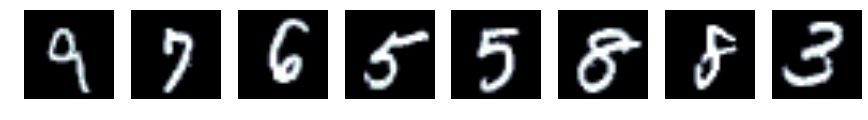

In [21]:
@interact(i=(0,10))
def plot_mnist(i=3):
    fig, ax = plt.subplots(ncols=8)
    fig.set_size_inches((15,4))
    for j in range(8):
        ax[j].imshow(X[i*8+j].squeeze(),cmap="bone")
        ax[j].set_axis_off()

## map of conv1: size = (3,3)

In [22]:
w1 = model.get_weights(conv1.W)
w1.shape

(3, 3, 1, 32)

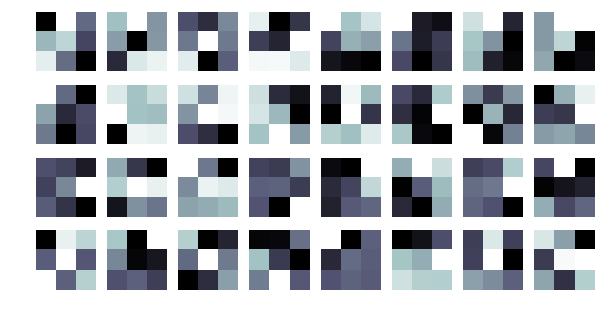

In [41]:
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        w1_ = w1[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(w1_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()

## map of conv2: size = (3,3)

In [42]:
w2 = model.get_weights(conv2.W)
w2.shape

(3, 3, 32, 64)

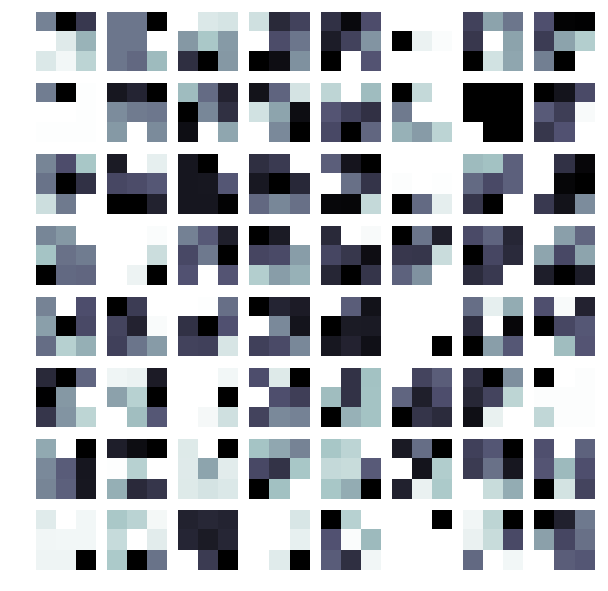

In [44]:
@interact(conv1=(0,31))
def plot_w2(conv1=5):
    fig, ax = plt.subplots(nrows=8,ncols=8)
    fig.set_size_inches((10,10))
    for i in range(8):
        for j in range(8):
            w2_ = w2[:,:,conv1,i*8+j].squeeze()
            ax[i][j].imshow(w2_,cmap="bone",interpolation="nearest")
            ax[i][j].set_axis_off()